In [1]:
# even if you don't use an import until way later on in the file, put your imports here!
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.base import TransformerMixin
from sklearn.preprocessing import Imputer


import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.preprocessing import StandardScaler


import category_encoders as ce

In [2]:
df = pd.read_csv('data/train.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522412 entries, 0 to 522411
Data columns (total 16 columns):
id                    522412 non-null int64
timestamp             522412 non-null int64
product_id            522412 non-null object
product_department    522412 non-null object
product_category      522412 non-null object
card_id               522412 non-null object
user_id               522412 non-null object
C15                   522412 non-null int64
C16                   522412 non-null int64
C17                   522412 non-null int64
C18                   522412 non-null int64
C19                   522412 non-null int64
C20                   522412 non-null int64
C21                   522412 non-null int64
amount                522412 non-null float64
isfraud               522412 non-null int64
dtypes: float64(1), int64(10), object(5)
memory usage: 63.8+ MB


In [4]:
df.head()

,id,timestamp,product_id,product_department,product_category,card_id,user_id,C15,C16,C17,C18,C19,C20,C21,amount,isfraud
0,202,1413851368636,fa41b2d8,ef5ed6b8,50e219e0,ecad2386,bd544220,300,50,2312,0,167,100075,16,195.65,0
1,9909,1413851725946,fa41b2d8,ef5ed6b8,50e219e0,ecad2386,bd544220,300,50,2312,0,167,100075,16,195.65,0
2,22692,1413851873924,fa41b2d8,ef5ed6b8,50e219e0,ecad2386,bd544220,300,50,2312,0,167,100075,16,195.65,0
3,22938,1413851651534,fa41b2d8,ef5ed6b8,50e219e0,ecad2386,bd544220,300,50,2312,0,167,100075,16,195.65,0
4,29187,1413853025188,fa41b2d8,ef5ed6b8,50e219e0,ecad2386,bd544220,300,50,2312,0,167,100075,16,195.65,0


## Train and Test split

In [19]:
df_train = df.iloc[0:int(0.8*len(df))].copy()
df_test = df.iloc[int(0.8*len(df)):].copy()
x_train = df_train.drop("isfraud",axis=1)
y_train = df_train[["isfraud"]]
x_test = df_test.drop("isfraud",axis=1)
y_test = df_test[["isfraud"]]

In [6]:
#df_train.corr()

,id,timestamp,C15,C16,C17,C18,C19,C20,C21,amount,isfraud
id,1.000000,0.997262,-0.024405,-0.028578,0.200082,-0.362891,-0.069622,0.015443,0.354386,0.068626,-0.039636
timestamp,0.997262,1.000000,-0.020650,-0.028547,0.237697,-0.380068,-0.102145,0.022834,0.381483,0.069857,-0.040610
C15,-0.024405,-0.020650,1.000000,0.137832,0.020483,-0.001957,0.005882,-0.013986,0.025216,0.017389,-0.006553
C16,-0.028578,-0.028547,0.137832,1.000000,0.056415,-0.004029,-0.027518,-0.019923,0.033556,0.011847,0.035303
C17,0.200082,0.237697,0.020483,0.056415,1.000000,-0.465531,-0.773736,0.176197,0.636559,0.040612,-0.009050
C18,-0.362891,-0.380068,-0.001957,-0.004029,-0.465531,1.000000,0.443708,-0.104834,-0.603801,-0.031815,0.013663
C19,-0.069622,-0.102145,0.005882,-0.027518,-0.773736,0.443708,1.000000,-0.197028,-0.545695,0.097546,0.007459
C20,0.015443,0.022834,-0.013986,-0.019923,0.176197,-0.104834,-0.197028,1.000000,-0.061719,-0.018905,0.000765
C21,0.354386,0.381483,0.025216,0.033556,0.636559,-0.603801,-0.545695,-0.061719,1.000000,0.056875,-0.040823
amount,0.068626,0.069857,0.017389,0.011847,0.040612,-0.031815,0.097546,-0.018905,0.056875,1.000000,-0.007150


In [7]:
df_train.nunique()

id                    417929
timestamp             417231
product_id              1362
product_department      1000
product_category           4
card_id                 1262
user_id                42114
C15                        8
C16                        9
C17                      280
C18                        4
C19                       53
C20                      155
C21                       50
amount                   959
isfraud                    2
dtype: int64

## Encode vars

### Ordinal encoding

In [9]:
x_train.columns

Index(['id', 'timestamp', 'product_id', 'product_department',
       'product_category', 'card_id', 'user_id', 'C15', 'C16', 'C17', 'C18',
       'C19', 'C20', 'C21', 'amount'],
      dtype='object')

In [24]:

ordinalencoder_vars = ['id', 'timestamp', 'product_id', 'product_department', \
                       'card_id', 'user_id', 'C17', 'C19', 'C20', 'C21', 'amount']
ohe_vars = ['product_category', 'C15', 'C16', 'C18']


# initialize transformer with desired options
ordinalencoder = ce.ordinal.OrdinalEncoder(cols=ordinalencoder_vars)

# initialize transformer with desired options
ohe = ce.one_hot.OneHotEncoder(cols=ohe_vars, use_cat_names=True, handle_unknown='indicator')


# fit transformer to data
ordinalencoder.fit(x_train)
ohe.fit(x_train)

# create new feature by transforming the datab
x_train = ordinalencoder.transform(x_train)
x_test = ordinalencoder.transform(x_train)


# create new feature by transforming the datab
x_train = ohe.transform(x_train)
x_test = ohe.transform(x_train)



In [28]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417929 entries, 0 to 417928
Data columns (total 15 columns):
id                    417929 non-null int64
timestamp             417929 non-null int64
product_id            417929 non-null object
product_department    417929 non-null object
product_category      417929 non-null object
card_id               417929 non-null object
user_id               417929 non-null object
C15                   417929 non-null int64
C16                   417929 non-null int64
C17                   417929 non-null int64
C18                   417929 non-null int64
C19                   417929 non-null int64
C20                   417929 non-null int64
C21                   417929 non-null int64
amount                417929 non-null float64
dtypes: float64(1), int64(9), object(5)
memory usage: 47.8+ MB


In [11]:
# initialize transformer with desired options
ordinalencoder = ce.ordinal.OrdinalEncoder()

# initialize transformer with desired options
ohe = ce.one_hot.OneHotEncoder(use_cat_names=True, handle_unknown='indicator')

ordinalencoder_vars = ['id', 'timestamp', 'product_id', 'product_department', \
                       'card_id', 'user_id', 'C17', 'C19', 'C20', 'C21', 'amount']
ohe_vars = ['product_category', 'C15', 'C16', 'C18']


# fit transformer to data
ordinalencoder.fit(x_train)

# create new feature by transforming the datab
x_train = ordinalencoder.transform(x_train)
x_test = ordinalencoder.transform(x_train)


### One-hot encoding

In [12]:
# initialize transformer with desired options
ohe = ce.one_hot.OneHotEncoder(use_cat_names=True, handle_unknown='indicator')

ohe_vars = ['product_category', 'C15', 'C16', 'C18']
x_train_ohe = x_train[ohe_vars]
x_test_ohe = x_test[ohe_vars]



# fit transformer to data
ohe.fit(x_train_ohe)

# create new feature by transforming the data
x_train_ohe = ohe.transform(x_train_ohe)
x_test_ohe = ohe.transform(x_test_ohe)

x_train_ohe

,product_category,C15,C16,C18
0,1,300,50,0
1,1,300,50,0
2,1,300,50,0
3,1,300,50,0
4,1,300,50,0
5,1,300,50,0
6,1,300,50,0
7,1,300,50,0
8,1,300,50,0
9,1,300,50,0


In [13]:
x_train_ohe.dtypes

product_category    int32
C15                 int64
C16                 int64
C18                 int64
dtype: object

In [14]:
df_train.C15.astype('category').cat.categories

Int64Index([120, 216, 300, 320, 480, 728, 768, 1024], dtype='int64')

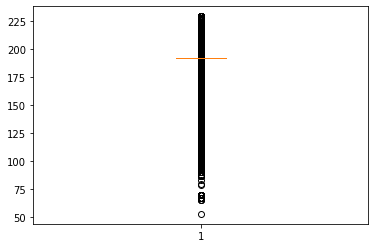

In [15]:
#df.boxplot(column="amount");
#plt.savefig('amount_box.png')

# Create the figure and two axes (two rows, one column)
fig, ax = plt.subplots()

# Create a plot of y = sin(x) on the first row
ax.boxplot(df_train.amount)

# Save the figure
plt.savefig('plots/amount_box.png')

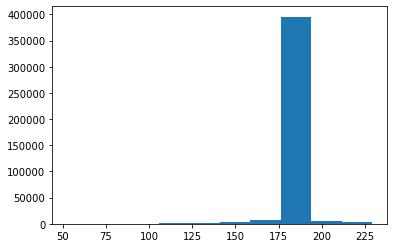

In [16]:
# Create the figure and two axes (two rows, one column)
fig, ax = plt.subplots()

# Create a plot of y = sin(x) on the first row
ax.hist(df_train.amount)

# Save the figure
plt.savefig('plots/amount_hist.png')

In [17]:
y = df_train[['isfraud']]
amount = df_train[['amount']]

y = df_train.isfraud
amount = df_train.amount

amount.corr(y)

#standardscaler = StandardScaler()
#standardscaler.fit(amount.values)
#amount_scaled = standardscaler.transform(amount)




-0.007149680870557378

In [18]:
y = df_train.isfraud
amount = df_train.amount

print(amount.corr(y))

standardscaler = StandardScaler()
standardscaler.fit(amount.to_frame())
amount_scaled = standardscaler.transform(amount.to_frame())
amount_scaled = pd.Series(amount_scaled[:,0])

print(amount_scaled.corr(y))


-0.007149680870557378
-0.007149680870557075
